In [112]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import  seaborn as sns

In [5]:
# data=np.loadtxt('uro_2.csv',encoding='utf-8',dtype=str)

In [3]:
# data = np.loadtxt('uro.csv', encoding='utf-8',dtype=str, skiprows=1, usecols=(0)) #注意，这样读出来的数据只有一排，需要用reshape来整理

In [127]:
df = pd.read_csv('pumajt.csv',header=0,index_col=[0]) #把特定的部分当作表头

我们发现，利用pandas来读取csv会显得更加方便。可以指定表头，而且对于汉字的支持也会更好

In [128]:
df

,身高,体重,BMI正常与否,数值BMI值,收缩压正常与否,收缩压,舒张压正常与否,舒张压,心率,血压饱和均值,SPO2正常与否,Hb正常与否,血红蛋白
健康自评,,,,,,,,,,,,,
148,70,171.0,75.0,2,25.648918,0,121,0,82,79,1,2,220.0
127,50,157.0,68.0,2,27.587326,2,121,2,145,79,1,2,220.0
83,60,158.0,65.0,2,26.037494,0,123,1,48,81,1,2,238.0
94,70,167.0,61.0,0,21.872423,0,110,0,70,82,1,2,194.0
63,70,156.0,58.0,0,23.833005,0,107,1,54,81,1,2,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,40,156.0,47.0,0,19.312952,1,87,1,55,79,1,2,247.0
42,60,164.0,56.0,0,20.820940,0,128,2,110,77,1,2,227.0
116,60,151.0,51.0,0,22.367440,0,99,0,64,65,1,2,220.0


In [119]:
print(df)

         身高     体重  BMI正常与否  数值BMI值    收缩压正常与否  收缩压  舒张压正常与否  舒张压     心率  \
ID                                                                         
148.0  70.0  171.0     75.0     2.0  25.648918  0.0    121.0  0.0   82.0   
127.0  50.0  157.0     68.0     2.0  27.587326  2.0    121.0  2.0  145.0   
83.0   60.0  158.0     65.0     2.0  26.037494  0.0    123.0  1.0   48.0   
94.0   70.0  167.0     61.0     0.0  21.872423  0.0    110.0  0.0   70.0   
63.0   70.0  156.0     58.0     0.0  23.833005  0.0    107.0  1.0   54.0   
...     ...    ...      ...     ...        ...  ...      ...  ...    ...   
42.0   60.0  164.0     56.0     0.0  20.820940  0.0    128.0  2.0  110.0   
116.0  60.0  151.0     51.0     0.0  22.367440  0.0     99.0  0.0   64.0   
121.0  50.0  152.5     63.5     2.0  27.339912  0.0    106.0  0.0   70.0   
160.0  70.0  164.0     54.0     0.0  20.077335  2.0    171.0  0.0   85.0   
NaN     NaN    NaN      NaN     NaN        NaN  NaN      NaN  NaN    NaN   

       血压饱和

In [129]:
Y=df.loc[:,[x for x in df.columns if x not in ['ID',"Hb正常与否"]]] #cast the location and name.

In [130]:
Y

,身高,体重,BMI正常与否,数值BMI值,收缩压正常与否,收缩压,舒张压正常与否,舒张压,心率,血压饱和均值,SPO2正常与否,血红蛋白
健康自评,,,,,,,,,,,,
148,70,171.0,75.0,2,25.648918,0,121,0,82,79,1,220.0
127,50,157.0,68.0,2,27.587326,2,121,2,145,79,1,220.0
83,60,158.0,65.0,2,26.037494,0,123,1,48,81,1,238.0
94,70,167.0,61.0,0,21.872423,0,110,0,70,82,1,194.0
63,70,156.0,58.0,0,23.833005,0,107,1,54,81,1,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...
153,40,156.0,47.0,0,19.312952,1,87,1,55,79,1,247.0
42,60,164.0,56.0,0,20.820940,0,128,2,110,77,1,227.0
116,60,151.0,51.0,0,22.367440,0,99,0,64,65,1,220.0


接下来应该填补缺损数据

for column in list(Y.columns[Y.isnull().sum()>0]):
    mean_val=Y[column].mean()
    Y[column].fillna(mean_val,inplace=True)

In [131]:
# for column in list(Y.columns[Y.isnull().sum()>0]):
for column in list(Y):
    try:
        mean_val=Y[column].mean()
        Y[column].fillna(mean_val,inplace=True)
    except:
            Y[column].fillna('0')
    else:
        Y.fillna(method='backfill',inplace=True)
        

最后需要删掉空列

Y.dropna(axis=1,inplace=True)

### 0表示删除行，1表示删除列wdsawdsawdsawdsa,最重要的是，需要用inplace=True才能把数字更新进去

In [132]:
Y.dropna(axis=1,inplace=True) 

可以用这个查看Y.loc[:,['心率平均值']],接下来进行数据整理，把除0出错的数据改变，本质上是进行两列运算。BMI=体重/身高^2
运算方法格式是：df['col3'] = df.apply(lambda x: x['col1'] + 2 * x['col2'], axis=1)


In [133]:
Y

,身高,体重,BMI正常与否,数值BMI值,收缩压正常与否,收缩压,舒张压正常与否,舒张压,心率,血压饱和均值,SPO2正常与否,血红蛋白
健康自评,,,,,,,,,,,,
148,70,171.0,75.0,2,25.648918,0,121,0,82,79,1,220.0
127,50,157.0,68.0,2,27.587326,2,121,2,145,79,1,220.0
83,60,158.0,65.0,2,26.037494,0,123,1,48,81,1,238.0
94,70,167.0,61.0,0,21.872423,0,110,0,70,82,1,194.0
63,70,156.0,58.0,0,23.833005,0,107,1,54,81,1,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...
153,40,156.0,47.0,0,19.312952,1,87,1,55,79,1,247.0
42,60,164.0,56.0,0,20.820940,0,128,2,110,77,1,227.0
116,60,151.0,51.0,0,22.367440,0,99,0,64,65,1,220.0


In [14]:
# Y['BMI'] = Y.apply(lambda x: x['体重']/x['身高']**2 *10000, axis=1)

In [134]:
 Y.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 148 to 160
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   身高        171 non-null    int64  
 1   体重        171 non-null    float64
 2   BMI正常与否   171 non-null    float64
 3   数值BMI值    171 non-null    int64  
 4   收缩压正常与否   171 non-null    float64
 5   收缩压       171 non-null    int64  
 6   舒张压正常与否   171 non-null    int64  
 7   舒张压       171 non-null    int64  
 8   心率        171 non-null    int64  
 9   血压饱和均值    171 non-null    int64  
 10  SPO2正常与否  171 non-null    int64  
 11  血红蛋白      171 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 17.4 KB


In [135]:
X=df['Hb正常与否']

In [136]:
X

健康自评
148    2
127    2
83     2
94     2
63     2
      ..
153    2
42     2
116    2
121    2
160    2
Name: Hb正常与否, Length: 171, dtype: int64

In [137]:
Y.to_csv('pumajt2.csv', encoding='utf-8-sig')

In [44]:
#Y=pd.read_csv('pumajt2.csv', header=0,index_col=[0]) #把特定的部分当作表头

In [109]:
Y

,体重,BMI正常与否,数值BMI值,收缩压正常与否,收缩压,舒张压正常与否,舒张压,心率,血压饱和均值,SPO2正常与否,血红蛋白,COPD
身高,,,,,,,,,,,,
70,171.0,75.0,2,25.648918,0,121,0,82,79,1,2,2
50,157.0,68.0,2,27.587326,2,121,2,145,79,1,2,2
60,158.0,65.0,2,26.037494,0,123,1,48,81,1,2,2
70,167.0,61.0,0,21.872423,0,110,0,70,82,1,2,2
70,156.0,58.0,0,23.833005,0,107,1,54,81,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
40,156.0,47.0,0,19.312952,1,87,1,55,79,1,2,2
60,164.0,56.0,0,20.820940,0,128,2,110,77,1,2,2
60,151.0,51.0,0,22.367440,0,99,0,64,65,1,2,2


In [47]:
Y.info


<bound method DataFrame.info of          身高    体重  BMI正常与否     数值BMI值  收缩压正常与否  收缩压  舒张压正常与否  舒张压  血压饱和均值  \
健康自评                                                                        
70    171.0  75.0        2  25.648918        0  121        0   82      79   
50    157.0  68.0        2  27.587326        2  121        2  145      79   
60    158.0  65.0        2  26.037494        0  123        1   48      81   
70    167.0  61.0        0  21.872423        0  110        0   70      82   
70    156.0  58.0        0  23.833005        0  107        1   54      81   
...     ...   ...      ...        ...      ...  ...      ...  ...     ...   
40    156.0  47.0        0  19.312952        1   87        1   55      79   
60    164.0  56.0        0  20.820940        0  128        2  110      77   
60    151.0  51.0        0  22.367440        0   99        0   64      65   
50    152.5  63.5        2  27.339912        0  106        0   70      87   
70    164.0  54.0        0  20.077335       

model.fit(x, y),可以直接对x,y进行拟合


你也可以用StatsModels包在Python中实现逻辑回归。通常情况下，当你需要更多与模型和结果有关的统计细节时，你要这样做。该程序与scikit-learn的程序类似。

In [138]:
import numpy as np
import statsmodels.api as sm


In [139]:
model = sm.GLS(X, Y) #logistic 回归

In [140]:
model.fit()

In [142]:
result=model.fit()
result

In [143]:
print(result.summary())

                                 GLS Regression Results                                
Dep. Variable:                 Hb正常与否   R-squared (uncentered):                   1.000
Model:                            GLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.154e+05
Date:                Fri, 14 Jan 2022   Prob (F-statistic):                   1.81e-306
Time:                        21:48:01   Log-Likelihood:                          414.54
No. Observations:                 171   AIC:                                     -805.1
Df Residuals:                     159   BIC:                                     -767.4
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

最后可以查看全部拟合的结果，除了结果之外，我们也可以用help(result)来看看它的基本用法


In [28]:
last=result.summary2()

In [27]:
print(last)

                                   Results: Generalized least squares
Model:                           GLS                      Adj. R-squared (uncentered):         0.966    
Dependent Variable:              Location                 AIC:                                 930.2724 
Date:                            2021-10-21 10:48         BIC:                                 1222.6460
No. Observations:                1504                     Log-Likelihood:                      -410.14  
Df Model:                        55                       F-statistic:                         779.7    
Df Residuals:                    1449                     Prob (F-statistic):                  0.00     
R-squared (uncentered):          0.967                    Scale:                               0.10485  
--------------------------------------------------------------------------------------------------------
                                                         Coef.  Std.Err.    t     P>|t|   

In [144]:
data=result.conf_int()
b_axis=data.iloc[:,0].values
a_axis=np.arange(b_axis.size)

row_name=data.index
data

,0,1
身高,-0.000107,0.000398
体重,0.011842,0.012675
BMI正常与否,-0.017558,-0.015851
数值BMI值,-0.004285,0.004332
收缩压正常与否,0.040612,0.044995
收缩压,-0.006409,0.005061
舒张压正常与否,-0.000197,0.000304
舒张压,-0.005830,0.005058
心率,-0.000318,0.000325
血压饱和均值,-0.000404,0.000944


好了上面就完成了logistic回归的全部内容和代码。接下来，我们需要plt.hist(lr.coef_) 
plt.show() 画一画系数：

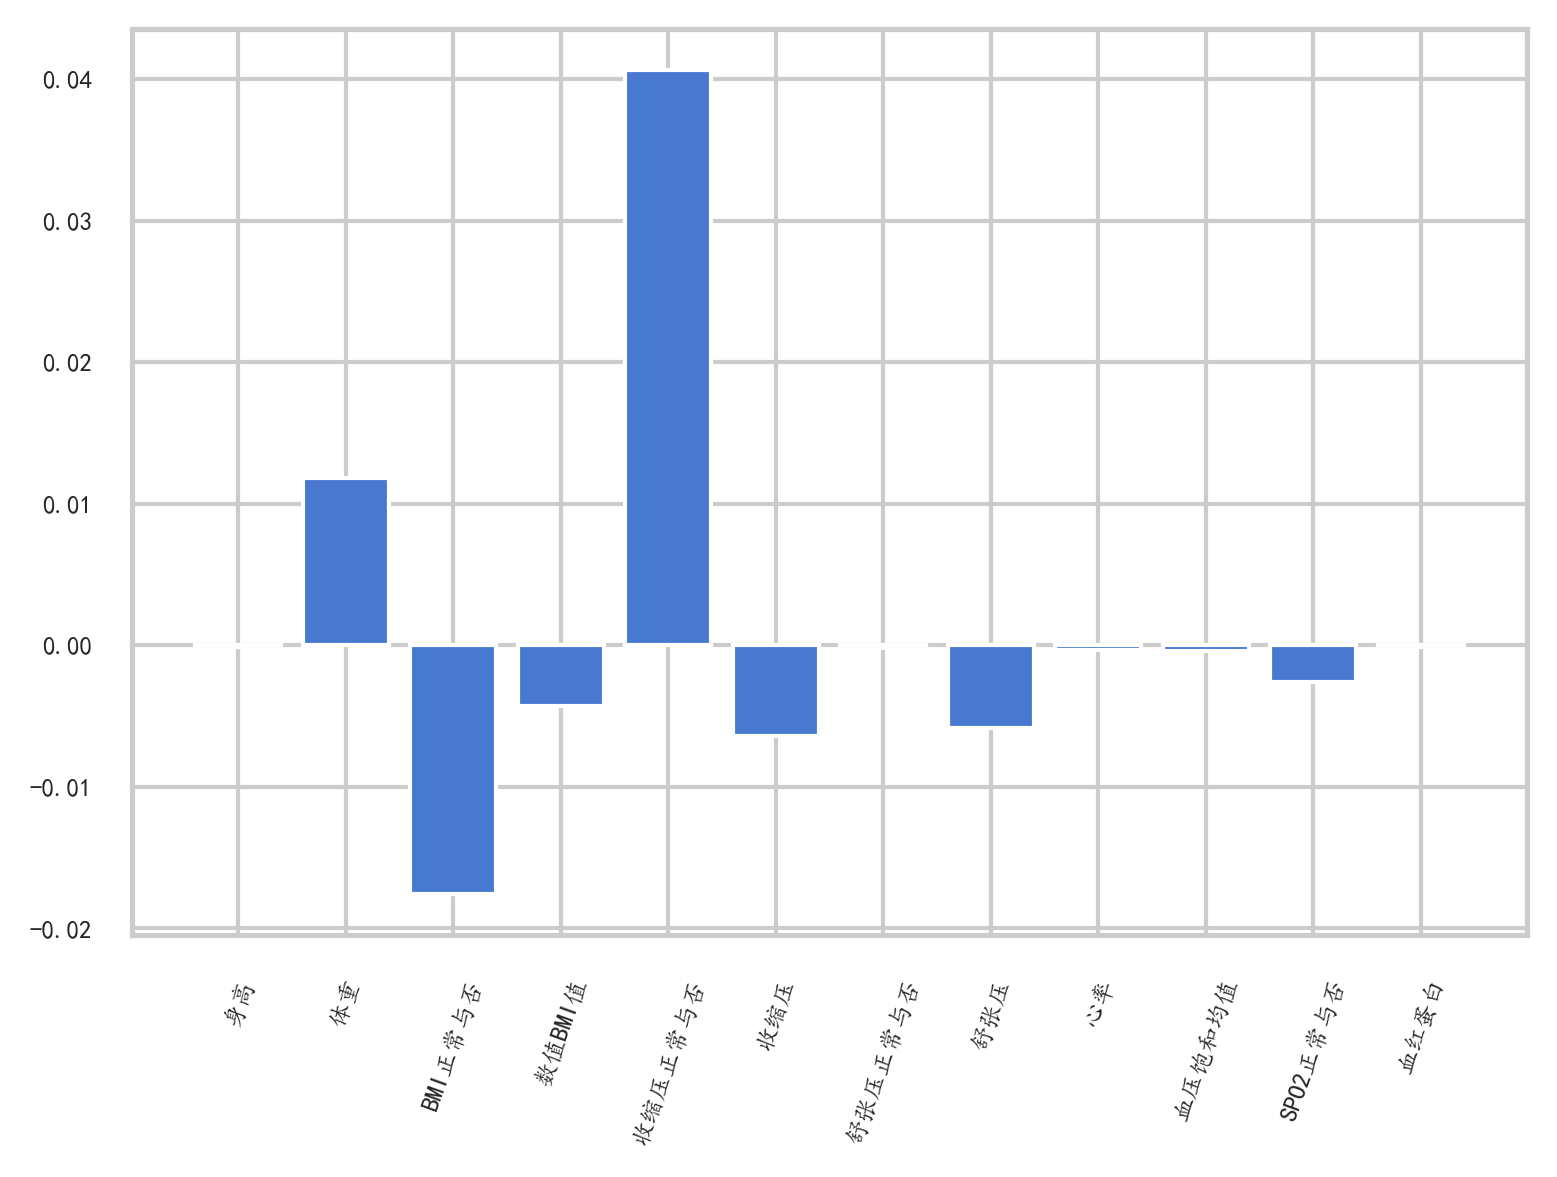

In [148]:
ax=plt.bar(row_name,b_axis) 
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.rcParams['font.sans-serif']=['kaiti'] #用来正常显示中文标签
plt.rcParams['font.size']=10
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.xticks(rotation=70, fontsize=6)
plt.yticks(fontsize=6)
fig=plt.gcf()
plt.show()
path='E:'#图片输出路径
fig.savefig(path+'输出图片.svgz',format='svgz',dpi=300)#输出

D:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36523 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 39640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20307 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 37325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py

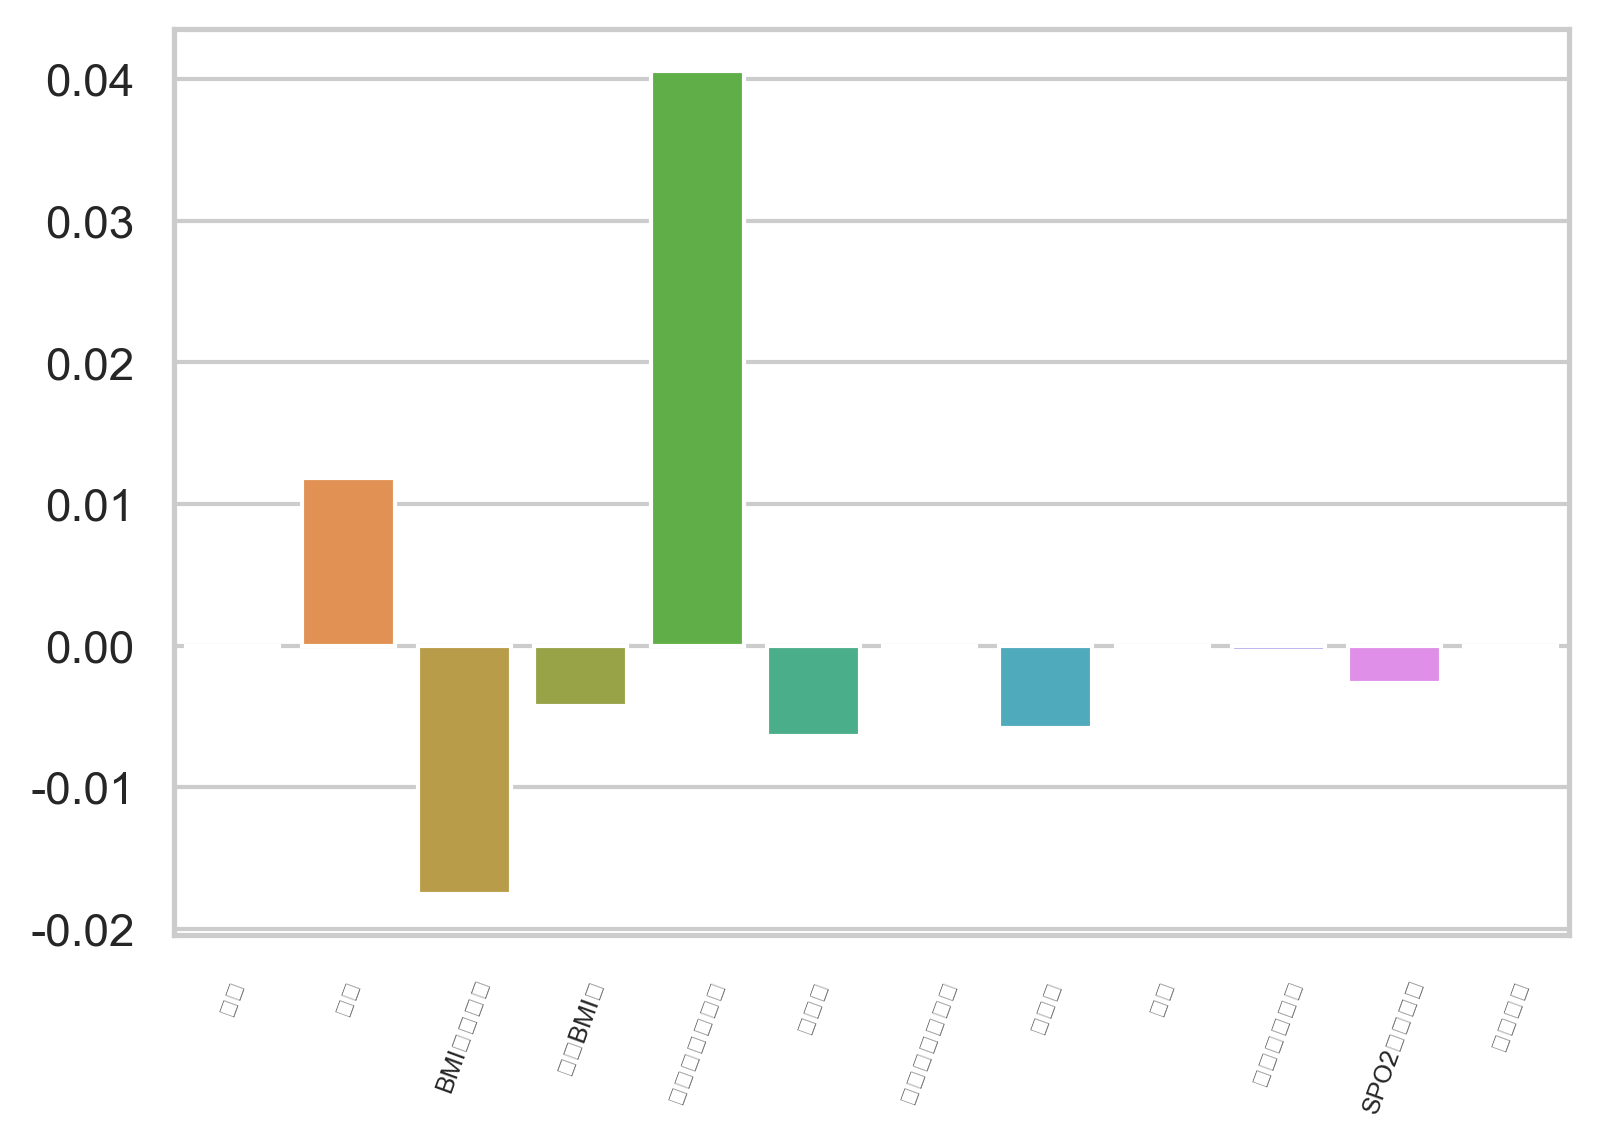

In [146]:
sns.set(style="whitegrid",palette="muted",color_codes=True)
# plt.rcParams['font.sans-serif']=['KaiTi']
sns.barplot(x=row_name, y=b_axis)
plt.xticks(rotation=70, fontsize=6)
plt.grid(b=True, which='minor', color='w', linewidth=0.1)
fig=plt.gcf()
fig.savefig("E:/plot彩色柱状图.png")


Help on NoneType object:

class NoneType(object)
 |  Methods defined here:
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



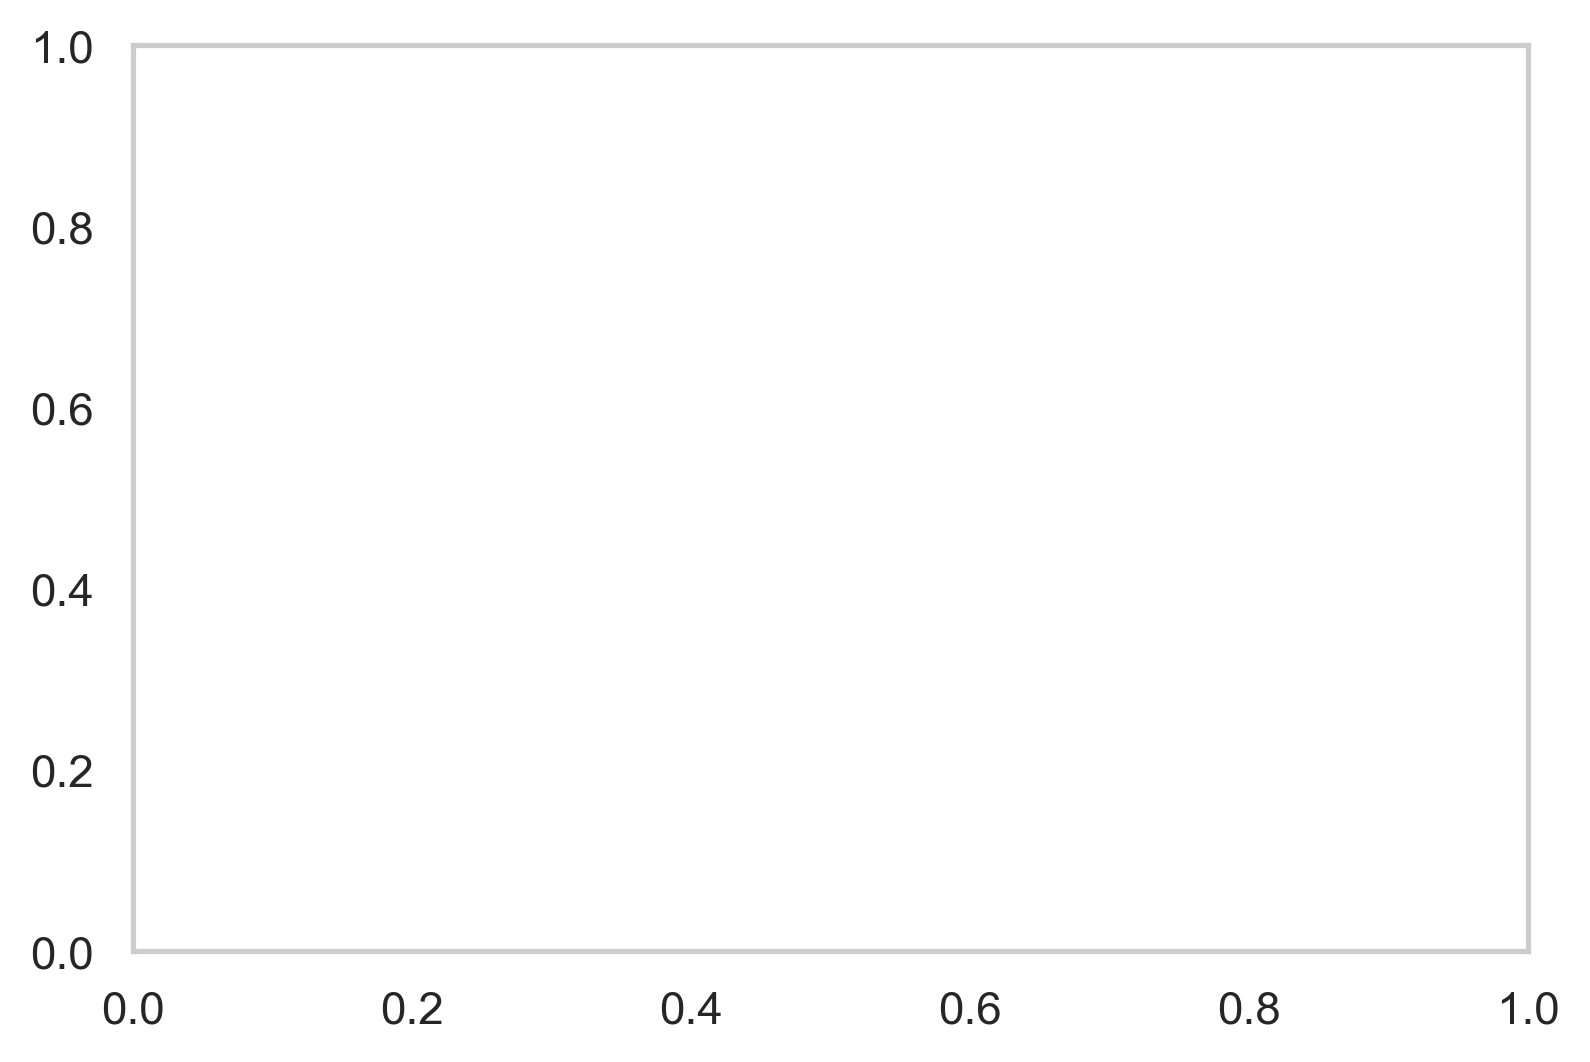

In [34]:
help(plt.grid())



In [41]:
print(lr.coef_)

[[1.18109091]]


你现在知道什么是逻辑回归以及如何用Python实现它的分类。你已经使用了许多开源包，包括NumPy，来处理数组，以及Matplotlib来可视化结果。你还使用scikit-learn和StatsModels来创建、拟合、评估和应用模型。

一般来说，Python中的逻辑回归有一个直接的和用户友好的实现。它通常由这些步骤组成。

导入包、函数和类
获取需要处理的数据，如果合适的话，对其进行转换
创建一个分类模型，用现有数据训练（或拟合）它
评估你的模型，看它的性能是否令人满意
应用你的模型来进行预测
在理解机器学习最重要的领域之一方面，你已经取得了长足的进步! 如果你有问题或意见，那么请把它们放在下面的评论区。

In [1]:
print(lr.l1_ratio)

NameError: name 'lr' is not defined

In [27]:
model.cov_params_func_l1

<bound method DiscreteModel.cov_params_func_l1 of <statsmodels.discrete.discrete_model.Logit object at 0x0000020EE9FF2D00>>

In [28]:
model.score

<bound method Logit.score of <statsmodels.discrete.discrete_model.Logit object at 0x0000020EE9FF2D00>>